<h1><center>Classification of Iris Flowers<h1><center>

<h4>About this Notebook</h4>
    
In this notebook, we utilize several popular classification algorithms to determine what type of Iris flower for each case is based on its features. We will take a quick look at the data, pre-process the data if needed, split the data into training and test groups, and finally implement several classification algorithms and evaluate there performance.  

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

df = pd.read_table('iris.data', delimiter=',')
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Lets see how many of each class we have

In [91]:
df['Class'].value_counts()


Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

## Lets quickly see if there are any distinct groups among the features

Text(0, 0.5, 'Class')

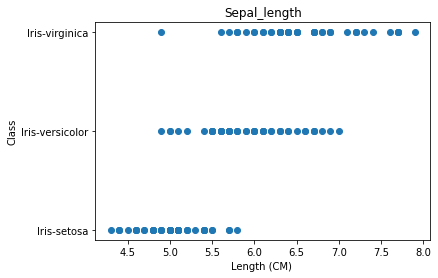

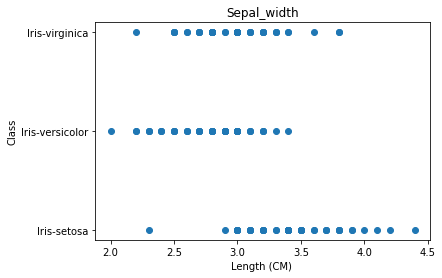

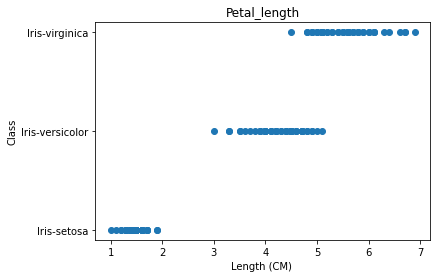

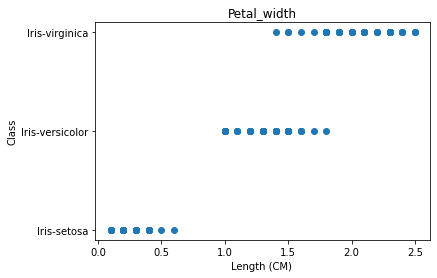

In [117]:
fig, a = plt.subplots()
a.set_title('Sepal_length')
plt.scatter(df.Sepal_length,df.Class)
plt.xlabel("Length (CM) ")
plt.ylabel("Class")

fig, b = plt.subplots()
b.set_title('Sepal_width')
plt.scatter(df.Sepal_width,df.Class)
plt.xlabel("Length (CM) ")
plt.ylabel("Class")

fig, c = plt.subplots()
c.set_title('Petal_length')
plt.scatter(df.Petal_length,df.Class)
plt.xlabel("Length (CM) ")
plt.ylabel("Class")

fig, d = plt.subplots()
d.set_title('Petal_width')
plt.scatter(df.Petal_width,df.Class)
plt.xlabel("Length (CM) ")
plt.ylabel("Class")

## We can see that there are distinct groups within the data. there is a lot of overlap between the class.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB0AEDEC70>]],
      dtype=object)

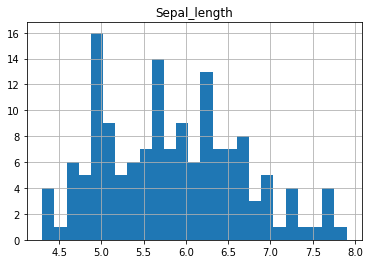

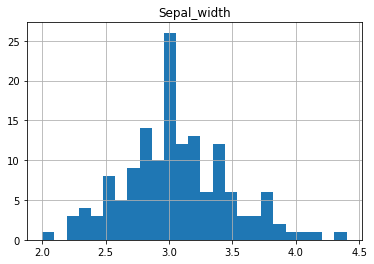

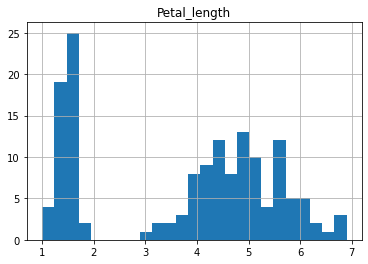

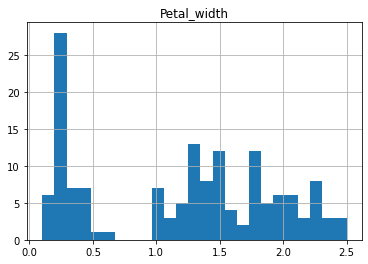

In [118]:
df.hist(column='Sepal_length', bins=25)
df.hist(column='Sepal_width', bins=25)
df.hist(column='Petal_length', bins=25)
df.hist(column='Petal_width', bins=25)

## Converting the Pandas DataFram into a Numpy array for use in KNN methods

In [96]:
df.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'], dtype='object')

In [102]:
X = df[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']] .values 
y = df['Class'].values
print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


## Splitting the data into Train and Test groups (80% Training, 20% Testing)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


## Creating KNN models with various 'K' values and evaluating their accuracy using the test set

In [104]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


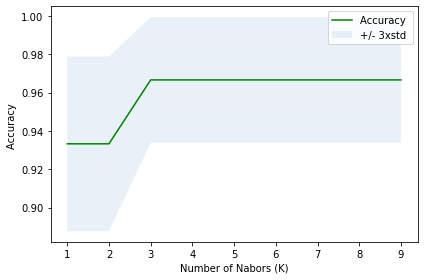

The best accuracy was with 0.9666666666666667 with k= 3


In [109]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


We can clealy see the best results came from k = 3

In [113]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,y_train)
yhat=neigh.predict(X_test)

